# Dataset Description
This dataset provides a comprehensive overview of various factors affecting student performance in exams.

The dataset was downloaded from Kaggle here: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from copy import deepcopy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.shape

(6607, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
data.drop_duplicates(inplace=True, keep='first')

In [8]:
data.shape

(6607, 20)

In [9]:
# imputing missing values with the mode
for column in data.columns:
    data[column].fillna(data[column].mode().iloc[0], inplace=True)

In [10]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [11]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [12]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [13]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

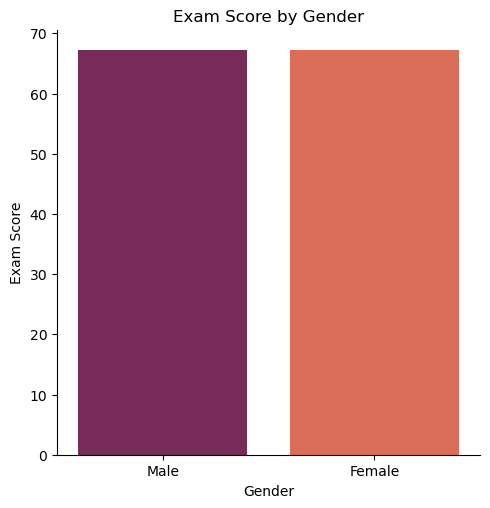

In [14]:
sns.catplot(data=data, x='Gender', y='Exam_Score', kind="bar", errorbar=None, palette="rocket")
plt.title('Exam Score by Gender')
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.show()

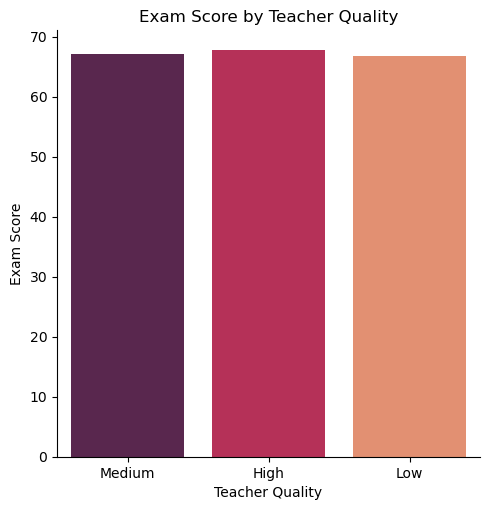

In [15]:
sns.catplot(data=data, x='Teacher_Quality', y='Exam_Score', kind="bar", errorbar=None, palette="rocket")
plt.title('Exam Score by Teacher Quality')
plt.xlabel("Teacher Quality")
plt.ylabel("Exam Score")
plt.show()

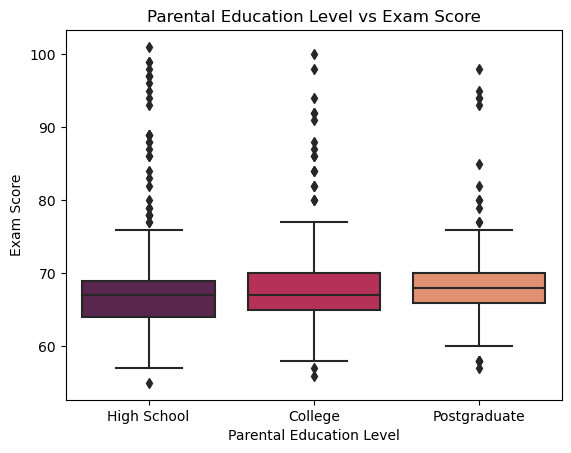

In [16]:
sns.boxplot(data=data, x='Parental_Education_Level', y='Exam_Score', palette="rocket")
plt.title('Parental Education Level vs Exam Score')
plt.xlabel("Parental Education Level")
plt.ylabel("Exam Score")
plt.show()

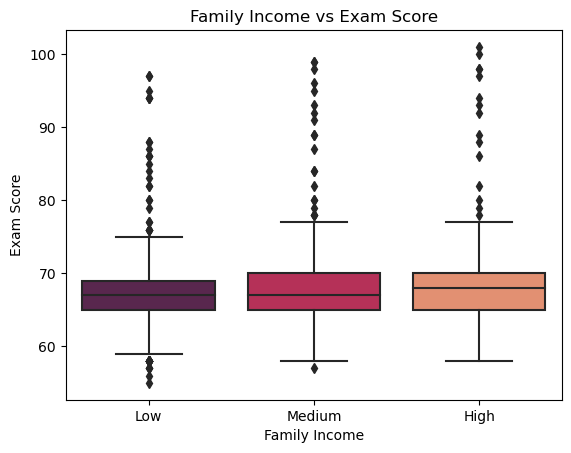

In [17]:
sns.boxplot(data=data, x='Family_Income', y='Exam_Score', palette="rocket")
plt.title('Family Income vs Exam Score')
plt.xlabel("Family Income")
plt.ylabel("Exam Score")
plt.show()

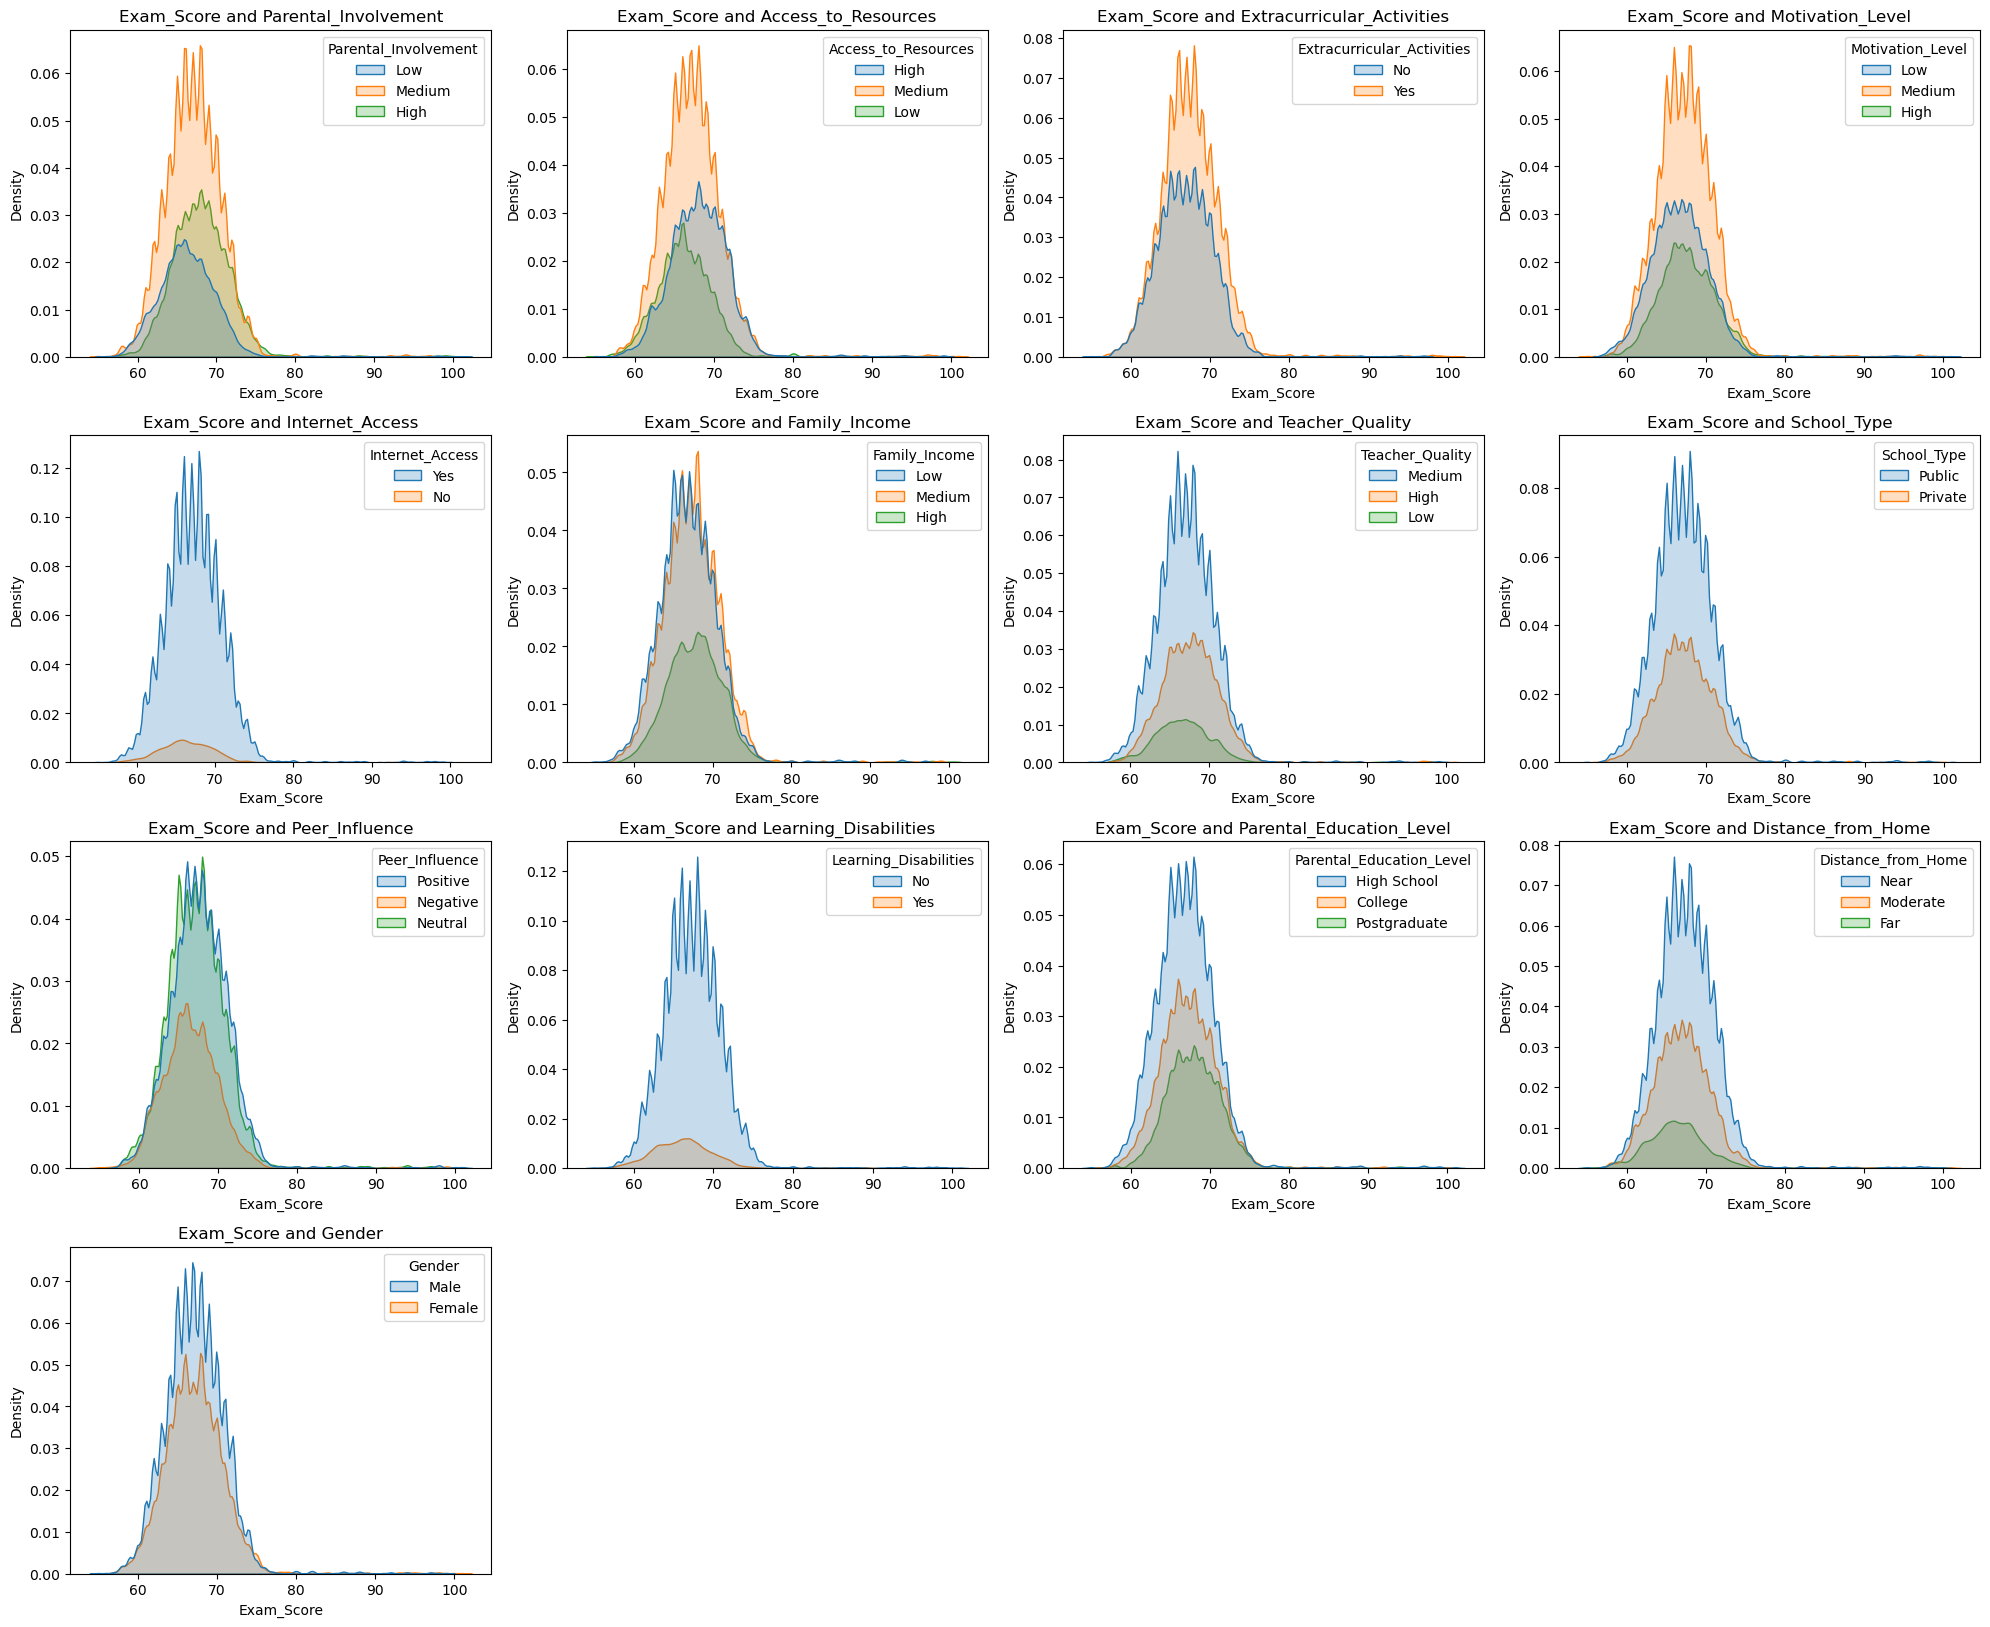

In [18]:
plt.figure(figsize=(20,20))
for i in range(len(cat_cols)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=data['Exam_Score'], hue=data[cat_cols[i]], shade=True, bw_adjust=.5)
    plt.title(f'Exam_Score and {cat_cols[i]}')
    plt.tight_layout()  
plt.show()

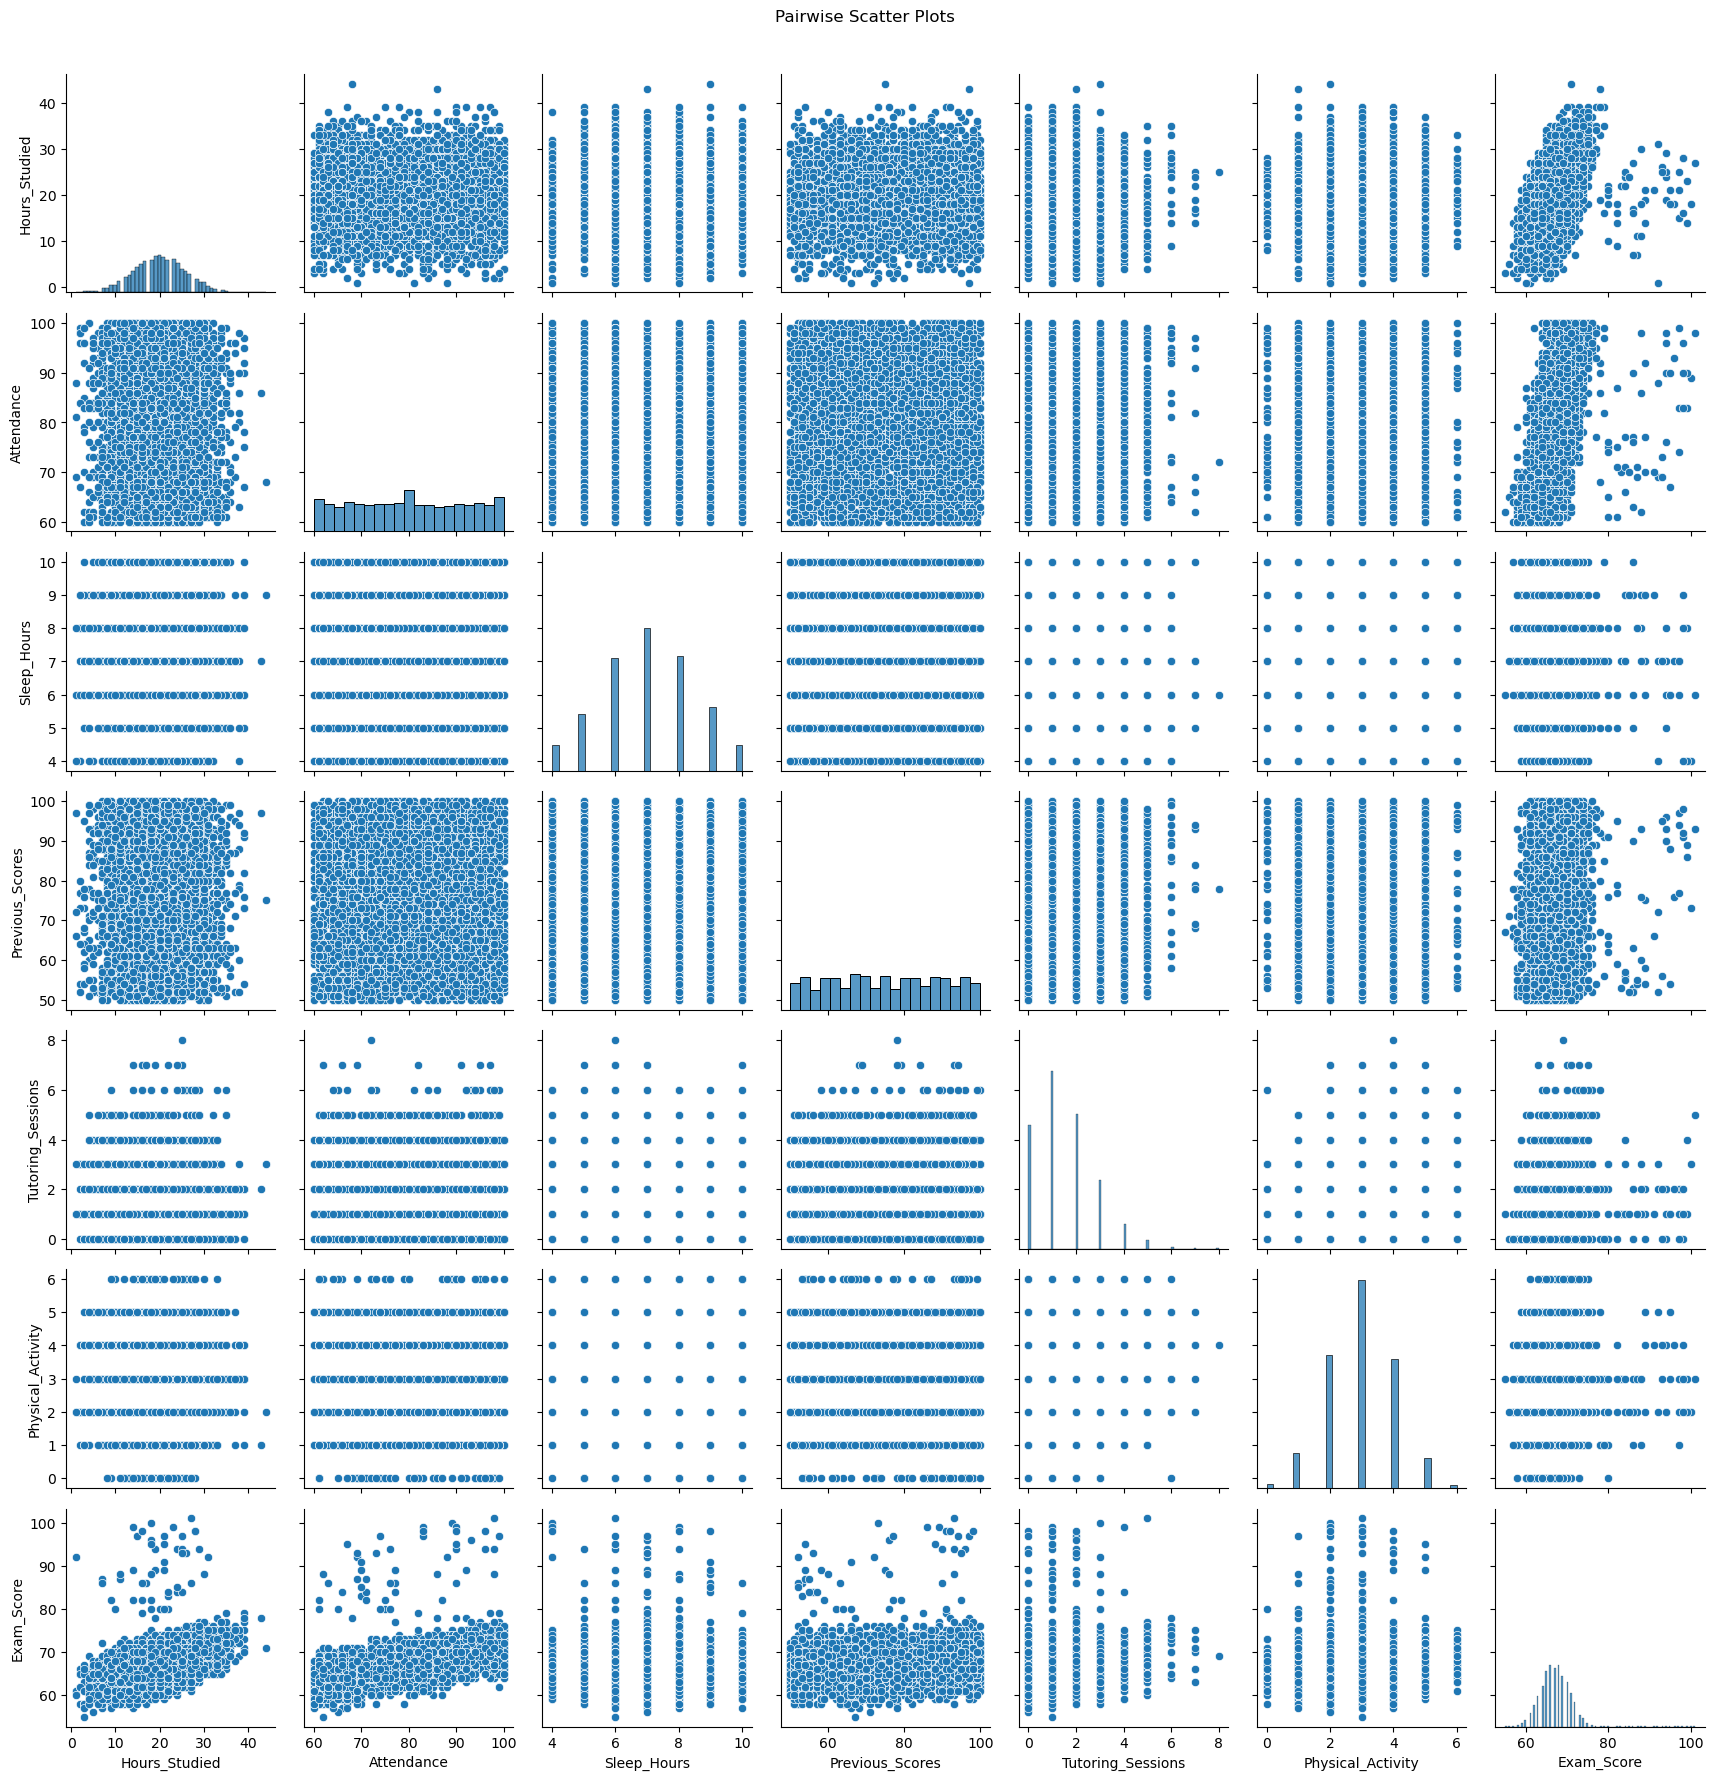

In [19]:
# plotting the relationships between all numerical variables
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [20]:
# splitting the dataset by student gender
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

In [21]:
print(f"No. of Male Students: {male_df.shape[0]}")
print(f"No. of Female Students: {female_df.shape[0]}")

No. of Male Students: 3814
No. of Female Students: 2793


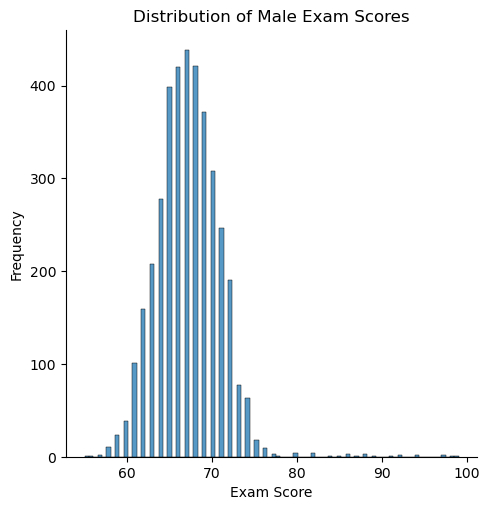

In [22]:
sns.displot(data=male_df, x="Exam_Score", kind="hist")
plt.title("Distribution of Male Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

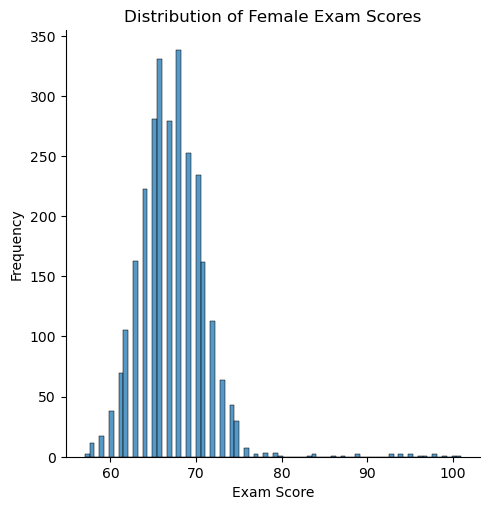

In [23]:
sns.displot(data=female_df, x="Exam_Score", kind="hist")
plt.title("Distribution of Female Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

### Testing the data for normality

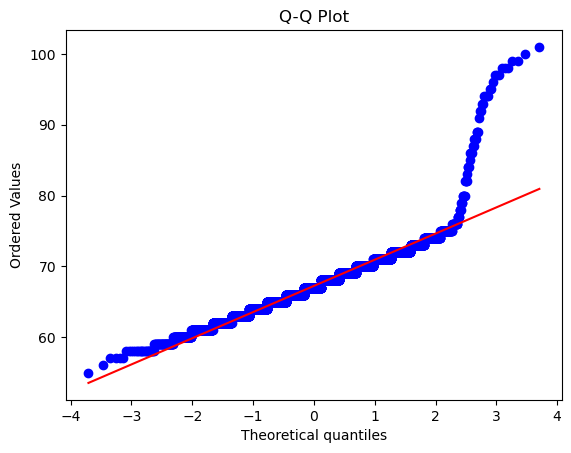

The Q-Q plot above shows that most of the points do not fall along the line.
This means the data deviates from the assumed distribution, in this case a normal distribution


In [24]:
# plotting a Q-Q Plot 
stats.probplot(data['Exam_Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.show()

print('''The Q-Q plot above shows that most of the points do not fall along the line.
This means the data deviates from the assumed distribution, in this case a normal distribution''')

In [31]:
# Kolmogorov-Smirnov test
print("Null Hypothesis: The data is noramlly distributed\nAlternative Hypothesis: The data is not normally distributed")
print('-'*60)

stat, p_value = stats.kstest(data['Exam_Score'], stats.norm.cdf, args=(np.mean(data['Exam_Score']), np.std(data['Exam_Score'])))
print(f'K-S Statistic: {stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

Null Hypothesis: The data is noramlly distributed
Alternative Hypothesis: The data is not normally distributed
------------------------------------------------------------
K-S Statistic: 0.08172049752555033
P-value: 7.88261145242964e-39
Reject the null hypothesis: The data is not normally distributed.


The Kolmogorov-Smirnov compares the underlying distribution of the data against a given distribution, in this case the normal distribution. Since the p-value is less than the significance level, the null hypothesisis rejected; meaning that the data is not normally distributed.

### Hypothesis Testing using the Mann-Whitney U Test.

The Mann-Whitney U Test was used in this case since it's non-parametric (doesn't assume the distribution of the data). The test was conducted to see if there was a significant difference in exam scores between male and female students.

In [56]:
# Mann-Whitney U Test
print("Null Hypothesis: There is no significant difference in exam scores between male and female students")
print("Alternative Hypothesis: There is a significant difference in exam scores between male and female students")
print('-'*60)

u_stat, p_value = stats.mannwhitneyu(male_df["Exam_Score"], female_df["Exam_Score"])
print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in exam scores between male and female students.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in exam scores between male and female students.")


Null Hypothesis: There is no significant difference in exam scores between male and female students
Alternative Hypothesis: There is a significant difference in exam scores between male and female students
------------------------------------------------------------
Mann-Whitney U Statistic: 5372067.5
P-Value: 0.5481442905111631
Fail to reject the null hypothesis: There is no significant difference in exam scores between male and female students.


### Correlation Matrix

In [33]:
num_cols = data.select_dtypes(include=['int64']).columns.tolist()

In [34]:
data[num_cols].corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


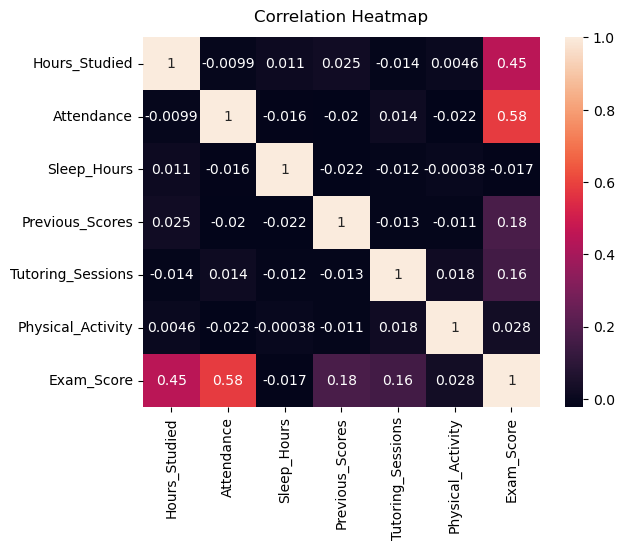

In [37]:
sns.heatmap(data=data[num_cols].corr(), annot=True)
plt.title("Correlation Heatmap", y=1.02)
plt.show()

In [38]:
data[num_cols].corr().unstack().sort_values(ascending=False)

Hours_Studied      Hours_Studied        1.000000
Attendance         Attendance           1.000000
Physical_Activity  Physical_Activity    1.000000
Tutoring_Sessions  Tutoring_Sessions    1.000000
Sleep_Hours        Sleep_Hours          1.000000
Previous_Scores    Previous_Scores      1.000000
Exam_Score         Exam_Score           1.000000
Attendance         Exam_Score           0.581072
Exam_Score         Attendance           0.581072
                   Hours_Studied        0.445455
Hours_Studied      Exam_Score           0.445455
Previous_Scores    Exam_Score           0.175079
Exam_Score         Previous_Scores      0.175079
                   Tutoring_Sessions    0.156525
Tutoring_Sessions  Exam_Score           0.156525
Exam_Score         Physical_Activity    0.027824
Physical_Activity  Exam_Score           0.027824
Hours_Studied      Previous_Scores      0.024846
Previous_Scores    Hours_Studied        0.024846
Physical_Activity  Tutoring_Sessions    0.017733
Tutoring_Sessions  P

In [39]:
df = deepcopy(data)

In [40]:
# converting categorical data to numerical data using one hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_cols))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(cat_cols, axis=1)

In [41]:
df_encoded

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,19,64,8,59,2,4,61,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24,98,7,91,2,4,74,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,29,89,8,98,1,4,71,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,19,92,6,65,3,4,70,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6603,23,76,8,81,3,2,69,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6604,20,90,6,65,3,2,68,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6605,10,86,6,91,2,3,68,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### Building the Regression Models

In [42]:
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# evaluation function 
def evaluation(actual, predicted):
    R2_Score = np.round(r2_score(actual, predicted), 2) 
    Mean_Squared_Error  = np.round(mean_squared_error(actual, predicted), 2) 
    Root_Mean_Squared_Error = np.round(root_mean_squared_error(actual, predicted), 2) 

    result = {'R2 Score':R2_Score, 'Mean Squared Error':Mean_Squared_Error,'Root Mean Squared Error':Root_Mean_Squared_Error}
  
    return result

In [46]:
y_pred_lr = lr_model.predict(X_test)
lr_evaluation = evaluation(y_test, y_pred_lr)
lr_evaluation

{'R2 Score': 0.77, 'Mean Squared Error': 3.11, 'Root Mean Squared Error': 1.76}

In [47]:
# predicting using both the training and test set, to check for overfitting
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print('-'*60)
print(f"Training Root Mean Squared Error = {train_rmse}")
print(f"Test Root Mean Squared Error = {test_rmse}")
print('-'*60)
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training MSE: 4.571108447515044
Test MSE: 3.110987585329938
------------------------------------------------------------
Training Root Mean Squared Error = 2.1380150718633963
Test Root Mean Squared Error = 1.763799190761221
------------------------------------------------------------
Training R-squared: 0.7094185591738029
Test R-squared: 0.7735812166128557


In [51]:
# cross-validation - testing model performance on various subsets of the data
cv_scores_lr = cross_val_score(lr_model, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f'Linear Regression Cross-Validation RMSE: {-cv_scores_lr.mean()}')

Linear Regression Cross-Validation RMSE: 1.953689895161758


### Support Vector Regression

In [52]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [53]:
y_pred_svr = svr_model.predict(X_test)

svr_evaluation = evaluation(y_test, y_pred_svr)
svr_evaluation

{'R2 Score': 0.65, 'Mean Squared Error': 4.84, 'Root Mean Squared Error': 2.2}

In [54]:
# predicting using both the training and test set, to check for overfitting
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print('-'*60)
print(f"Training Root Mean Squared Error = {train_rmse}")
print(f"Test Root Mean Squared Error = {test_rmse}")
print('-'*60)
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training MSE: 6.591200204703865
Test MSE: 4.841347809136316
------------------------------------------------------------
Training Root Mean Squared Error = 2.56733328664275
Test Root Mean Squared Error = 2.200306298935745
------------------------------------------------------------
Training R-squared: 0.5810030599256593
Test R-squared: 0.6476449838412308


In [55]:
# cross-validation - testing model performance on various subsets of the data
cv_scores_svr = cross_val_score(svr_model, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f'SVR Cross-Validation RMSE: {-cv_scores_svr.mean()}')

SVR Cross-Validation RMSE: 2.410108175086209


### XGBoost

In [57]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_xgb = xgb_model.predict(X_test)

xgb_evaluation = evaluation(y_test, y_pred_xgb)
xgb_evaluation

{'R2 Score': 0.66, 'Mean Squared Error': 4.64, 'Root Mean Squared Error': 2.15}

In [59]:
# predicting using both the training and test set, to check for overfitting
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print('-'*60)
print(f"Training Root Mean Squared Error = {train_rmse}")
print(f"Test Root Mean Squared Error = {test_rmse}")
print('-'*60)
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training MSE: 0.38684366994275354
Test MSE: 4.640883497568333
------------------------------------------------------------
Training Root Mean Squared Error = 0.6219675794949071
Test Root Mean Squared Error = 2.1542709898172823
------------------------------------------------------------
Training R-squared: 0.9754086799127316
Test R-squared: 0.6622348477647637


In [60]:
# cross-validation - testing model performance on various subsets of the data
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f'XGBoost Cross-Validation RMSE: {-cv_scores_xgb.mean()}')

XGBoost Cross-Validation RMSE: 2.282471691029112


### Random Forest Regression

In [61]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred_rfr = rfr_model.predict(X_test)

rfr_evaluation = evaluation(y_test, y_pred_rfr)
rfr_evaluation

{'R2 Score': 0.64, 'Mean Squared Error': 4.98, 'Root Mean Squared Error': 2.23}

In [63]:
# predicting using both the training and test set, to check for overfitting
y_train_pred = rfr_model.predict(X_train)
y_test_pred = rfr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print('-'*60)
print(f"Training Root Mean Squared Error = {train_rmse}")
print(f"Test Root Mean Squared Error = {test_rmse}")
print('-'*60)
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training MSE: 0.9318513192041523
Test MSE: 4.979572617246596
------------------------------------------------------------
Training Root Mean Squared Error = 0.9653244631750261
Test Root Mean Squared Error = 2.2314956009919884
------------------------------------------------------------
Training R-squared: 0.9407630114053985
Test R-squared: 0.6375849331249139


In [64]:
# cross-validation - testing model performance on various subsets of the data
cv_scores_rfr = cross_val_score(rfr_model, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f'Random Forest Cross-Validation RMSE: {-cv_scores_rfr.mean()}')

Random Forest Cross-Validation RMSE: 2.384279603560677


### Regression Plots

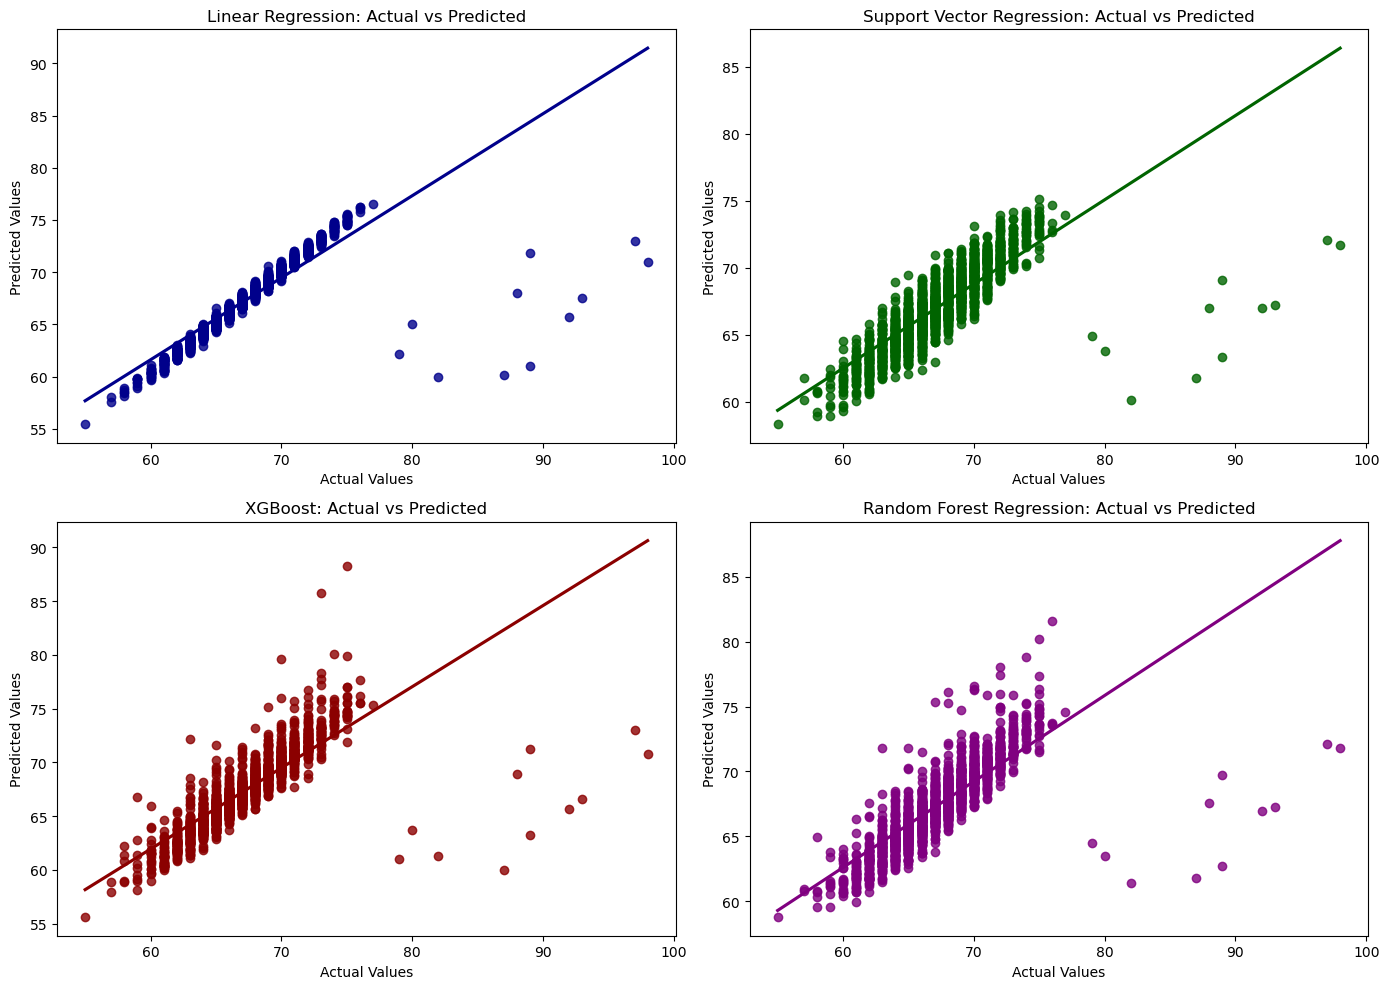

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# linear regression plot
sns.regplot(x=y_test, y=y_pred_lr, ci=None, color='darkblue', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Linear Regression: Actual vs Predicted')
axs[0, 0].set_xlabel('Actual Values')
axs[0, 0].set_ylabel('Predicted Values')

# svr plot
sns.regplot(x=y_test, y=y_pred_svr, ci=None, color='darkgreen', marker='o', ax=axs[0, 1])
axs[0, 1].set_title('Support Vector Regression: Actual vs Predicted')
axs[0, 1].set_xlabel('Actual Values')
axs[0, 1].set_ylabel('Predicted Values')

# xgboost plot
sns.regplot(x=y_test, y=y_pred_xgb, ci=None, color='darkred', marker='o', ax=axs[1, 0])
axs[1, 0].set_title('XGBoost: Actual vs Predicted')
axs[1, 0].set_xlabel('Actual Values')
axs[1, 0].set_ylabel('Predicted Values')

# rfr plot
sns.regplot(x=y_test, y=y_pred_rfr, ci=None, color='purple', marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Random Forest Regression: Actual vs Predicted')
axs[1, 1].set_xlabel('Actual Values')
axs[1, 1].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

The plots above show that the Linear Regression model has a better fit on the data compared to the other models.

In [68]:
model_eval = pd.DataFrame({
    "Linear Regression": lr_evaluation,
    "Support Vector Regression": svr_evaluation,
    "XGBoost": xgb_evaluation,
    "Random Forest Regression": rfr_evaluation
})
model_eval

,Linear Regression,Support Vector Regression,XGBoost,Random Forest Regression
R2 Score,0.77,0.65,0.66,0.64
Mean Squared Error,3.11,4.84,4.64,4.98
Root Mean Squared Error,1.76,2.20,2.15,2.23


The Linear Regression model is the best performing model, as it has the highest R2 score, meaning it has a good fit on the data. It also has the lowest root mean squared error, implying that the model has fewer errors in its predictions.